# Absenteeism at work

### Purpose: 
    Explore whether a person certain characteristic is expected to be away from work at some point in time or not.
    We will compare different classification models to obtain high performance.
    
### Dataset:
    The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

### Attribute Information:
    1. Individual identification (ID)
    2. Reason for absence (ICD).
    Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
        -> (1) Certain infectious and parasitic diseases
        -> (2) Neoplasms
        -> (3) Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
        -> (4) Endocrine, nutritional and metabolic diseases
        -> (5) Mental and behavioural disorders
        -> (6) Diseases of the nervous system
        -> (7) Diseases of the eye and adnexa
        -> (8) Diseases of the ear and mastoid process
        -> (9) Diseases of the circulatory system
        -> (10) Diseases of the respiratory system
        -> (11) Diseases of the digestive system
        -> (12) Diseases of the skin and subcutaneous tissue
        -> (13) Diseases of the musculoskeletal system and connective tissue
        -> (14) Diseases of the genitourinary system
        -> (15) Pregnancy, childbirth and the puerperium
        -> (16) Certain conditions originating in the perinatal period
        -> (17) Congenital malformations, deformations and chromosomal abnormalities
        -> (18) Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
        -> (19) Injury, poisoning and certain other consequences of external causes
        -> (20) External causes of morbidity and mortality
        -> (21) Factors influencing health status and contact with health services.
    And 7 categories without (CID) 
        -> (22) patient follow-up
        -> (23) medical consultation
        -> (24) blood donation 
        -> (25) laboratory examination 
        -> (26) unjustified absence
        -> (27) physiotherapy 
        -> (28) dental consultation
    3. Month of absence
    4. Day of the week
        -> (2) Monday
        -> (3) Tuesday
        -> (4) Wednesday
        -> (5) Thursday
        -> (6) Friday
    5. Seasons
        -> (1) summer
        -> (2) autumn 
        -> (3) winter
        -> (4) spring
    6. Transportation expense
        monthly transportation expenses of an idividual measured in dollars,
        travel expenses = fuel+parking+meals+transportation +other
    7. Distance from Residence to Work (kilometers)
    8. Service time (years)
    9. Age
    10. Work load Average/day
    11. Hit target (percent)
    12. Disciplinary failure (yes=1; no=0)
    13. Education
        -> (1) high school 
        -> (2) graduate
        -> (3) postgraduate
        -> (4) master and doctor
    14. Son (number of children)
    15. Social drinker (yes=1; no=0)
    16. Social smoker (yes=1; no=0)
    17. Pet (number of pet)
    18. Weight
    19. Height
    20. Body mass index
    21. Absenteeism time in hours (target)

## Table of contents.
    1. Importing relevant libraries.
    2. Data explotation and preprocessing.
    3. Building and training models.
    4. Evaluating models.
    5. Hyper-Parameters Tuning.
    6. The best model is...

## 1. Import libraries

In [205]:
import pandas as pd
import numpy as np

#models
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#performance
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import classification_report

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn import tree

## 2. Data exploration and preprocessing

In [206]:
raw_data = pd.read_csv('Absenteeism_at_work.csv', delimiter = ';')

In [207]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
raw_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


In [208]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [209]:
raw_data.describe(include = 'all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [210]:
raw_data.shape

(740, 21)

    The dataset includes 740 samples, 20 features, and the target. 
    
    Features: Disciplinary failure, Social Drinker, Social smoker include only 0s and 1s.
    Features: ID, Reason for absence, Education, Month of absence,	Day of the week, Seasons are categorical data.
    The rest of the features are numerical.
    
    Our purpose is to prepare the data to train models.

In [211]:
df = raw_data.copy()

### Absenteeism time in hours
    We want to know if the person will be absent based on the characteristics, but
    we don't want to know how many hours precisely is absent, so we are going to transform this feature to
    the column containing only 0s and 1s value.

In [212]:
df['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [213]:
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

    Base on pieces of information above, let's create two classes:
    -> moderately absent
    -> excessively absent
    We assume that person is excessively absent when it is away from work for 
    more than 4 hours.

In [214]:
target = np.where(df['Absenteeism time in hours'] > 4, 1, 0)
df['Excessive absenteeism'] = target
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Excessive absenteeism
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,0
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,0
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0


In [215]:
df_target = df.drop(['Absenteeism time in hours'], axis = 1)

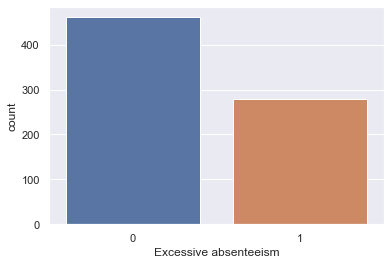

In [216]:
sns.countplot(df_target['Excessive absenteeism'])
plt.show()

In [217]:
df_target['Excessive absenteeism'].sum()/df_target['Excessive absenteeism'].shape[0]

0.377027027027027

    The target is imbalanced, so we will have to be cautious during interpreting models' scores.

### ID

In [218]:
np.sort(df_target['ID'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [219]:
df_target['ID'].unique().shape

(36,)

In [220]:
l = []
for j in range(1, 37):
    a = 0
    for i in range(df.shape[0]):
        if df.loc[i]['ID'] == j:
            a = a + df.loc[i]['Absenteeism time in hours']
    l.append(a)
a = []
for i in range(1, 37):
    a.append(str(i))
d = pd.DataFrame(data=l, index = a)

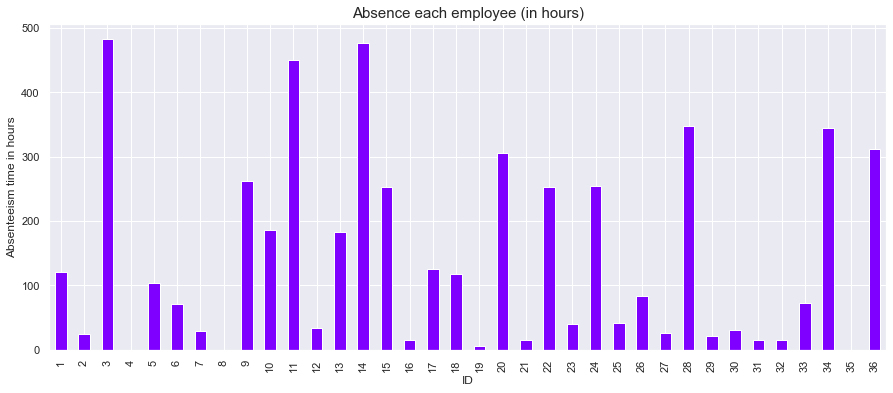

In [221]:
d.plot(kind='bar', figsize = (15,6), legend = False, cmap = 'rainbow')
plt.xlabel('ID')
plt.ylabel('Absenteeism time in hours')
plt.title('Absence each employee (in hours)', size = 15)
plt.show()

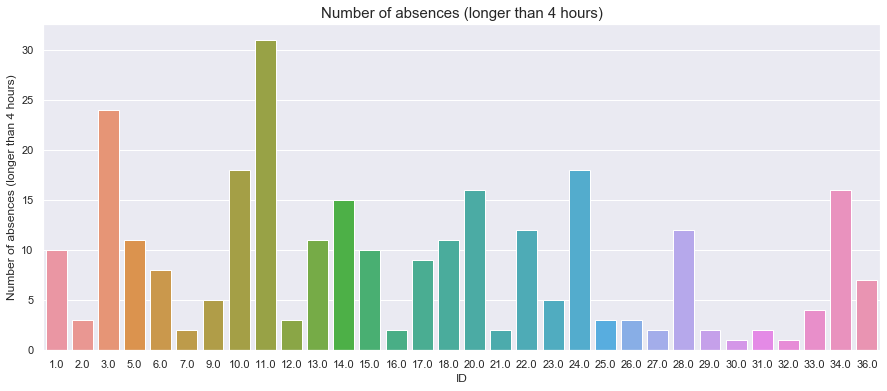

In [222]:
l =[]
for i in range(df_target.shape[0]):
    if df_target.loc[i]['Excessive absenteeism'] == 1:
        l.append(df_target.loc[i]['ID'])
plt.figure(figsize = (15,6))
sns.countplot(np.asarray(l))
plt.title('Number of absences (longer than 4 hours)', size = 15)
plt.xlabel('ID')
plt.ylabel('Number of absences (longer than 4 hours)')
plt.show()

    We have 36 employees. ID indicates precisely who has been away during working hours. This information doesn't
    improve our analysis in any way, so we will remove them from our dataset.

In [223]:
df_target_id = df_target.drop(['ID'], axis = 1)

In [224]:
df_target_id.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive absenteeism
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,0
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


### Reason for absence

In [225]:
reason_columns = pd.get_dummies(df_target_id['Reason for absence'], drop_first = True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


    Adding another 28 dummy variable will make our model too complicated. Let's divide these reasons of absences into
    four categories:
    -> Reason_1 - various diseases
    -> Reason_2 - related to pregnancy and giving birth
    -> Reason_3 - poisoning or signs not elsewhere categorized
    -> Reason_4 - light reasons for absence (dental appointment, physiotherapy, etc.)

In [226]:
reason_1 = reason_columns.loc[:, 1:14].max(axis = 1)
reason_2 = reason_columns.loc[:, 15:17].max(axis = 1)
reason_3 = reason_columns.loc[:, 18:21].max(axis = 1)
reason_4 = reason_columns.loc[:, 22:28].max(axis = 1)
df_target_id_reason = pd.concat([reason_1, reason_2, reason_3, reason_4, df_target_id], axis = 1)

In [227]:
df_target_id_reason = df_target_id_reason.drop(['Reason for absence'], axis = 1)

In [228]:
df_target_id.columns.values

array(['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Excessive absenteeism'],
      dtype=object)

In [229]:
df_target_id_reason.columns = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Excessive absenteeism']

In [230]:
df_target_id_reason.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive absenteeism
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,0
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [231]:
d = pd.DataFrame(df_target_id_reason[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].sum(),
                 index = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'])

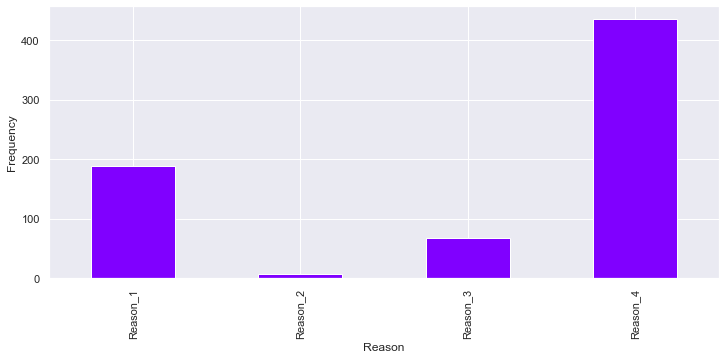

In [232]:
d.plot(kind='bar', figsize = (12,5), legend = False, cmap = 'rainbow')
plt.xlabel('Reason')
plt.ylabel('Frequency')
#plt.title('Absence each employee (in hours)', size = 15)
plt.show()

### Month of absence

In [233]:
np.sort(df_target_id_reason['Month of absence'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [234]:
df_target_id_reason['Month of absence'].value_counts()

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

In [235]:
for i in range(df_target_id_reason.shape[0]):
    if df_target_id_reason.loc[i]['Month of absence'] == 0:
        print(i)

737
738
739


In [236]:
df_target_id_reason.tail()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive absenteeism
735,1,0,0,0,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,1
736,1,0,0,0,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,0
737,0,0,0,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,0,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0
739,0,0,0,0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25,0


    In the real world we have 12 months instead of 13, so let's remove samples where the month of absence is equal 0.

In [237]:
df_target_id_reason_month = df_target_id_reason.drop([737, 738, 739], axis = 0)

In [238]:
df_target_id_reason_month = df_target_id_reason_month.reset_index(drop = True)
df_target_id_reason_month.tail()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Excessive absenteeism
732,0,0,0,1,7,4,1,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,27,1
733,0,0,0,1,7,4,1,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,24,1
734,1,0,0,0,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,25,1
735,1,0,0,0,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,1
736,1,0,0,0,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,0


In [239]:
df_target_id_reason_month['Month of absence'].unique().shape

(12,)

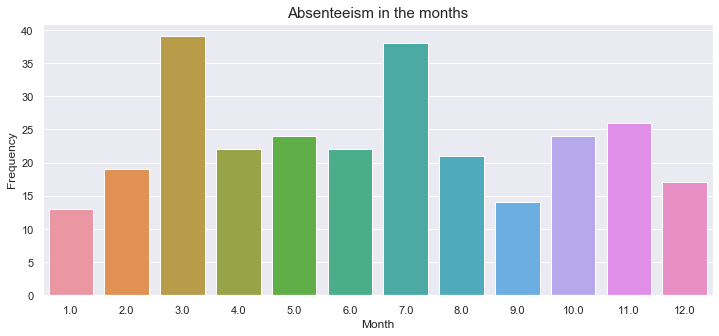

In [240]:
l =[]
for i in range(df_target_id_reason_month.shape[0]):
    if df_target_id_reason_month.loc[i]['Excessive absenteeism'] == 1:
        l.append(df_target.loc[i]['Month of absence'])
plt.figure(figsize = (12,5))
sns.countplot(np.asarray(l))
plt.title('Absenteeism in the months', size = 15)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

### Day of the week

In [241]:
np.sort(df_target_id_reason_month['Day of the week'].unique())

array([2, 3, 4, 5, 6], dtype=int64)

In [242]:
df_target_id_reason_month['Day of the week'].value_counts()

2    161
4    155
3    153
6    143
5    125
Name: Day of the week, dtype: int64

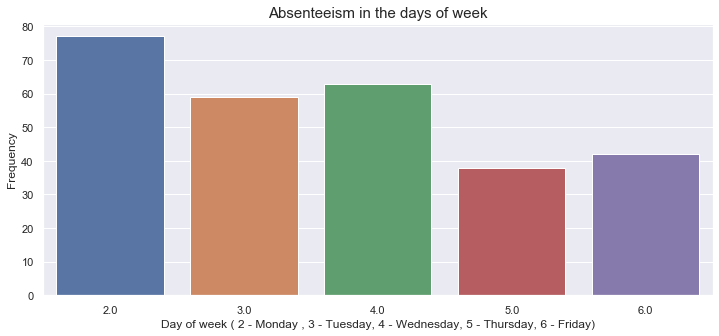

In [243]:
l =[]
for i in range(df_target_id_reason_month.shape[0]):
    if df_target_id_reason_month.loc[i]['Excessive absenteeism'] == 1:
        l.append(df_target.loc[i]['Day of the week'])
plt.figure(figsize = (12,5))
sns.countplot(np.asarray(l))
plt.title('Absenteeism in the days of week', size = 15)
plt.xlabel('Day of week ( 2 - Monday , 3 - Tuesday, 4 - Wednesday, 5 - Thursday, 6 - Friday)')
plt.ylabel('Frequency')
plt.show()

### Seasons

In [244]:
np.sort(df_target_id_reason_month['Seasons'].unique())

array([1, 2, 3, 4], dtype=int64)

In [245]:
df_target_id_reason_month['Seasons'].value_counts()

4    195
2    191
3    182
1    169
Name: Seasons, dtype: int64

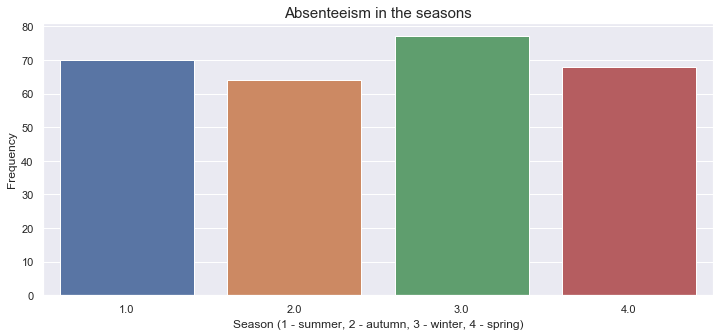

In [246]:
l =[]
for i in range(df_target_id_reason_month.shape[0]):
    if df_target_id_reason_month.loc[i]['Excessive absenteeism'] == 1:
        l.append(df_target.loc[i]['Seasons'])
plt.figure(figsize = (12,5))
sns.countplot(np.asarray(l))
plt.title('Absenteeism in the seasons', size = 15)
plt.xlabel('Season (1 - summer, 2 - autumn, 3 - winter, 4 - spring)')
plt.ylabel('Frequency')
plt.show()

### Transportation expense

In [247]:
df_target_id_reason_month['Transportation expense'].describe()

count    737.000000
mean     221.514247
std       66.960952
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: Transportation expense, dtype: float64

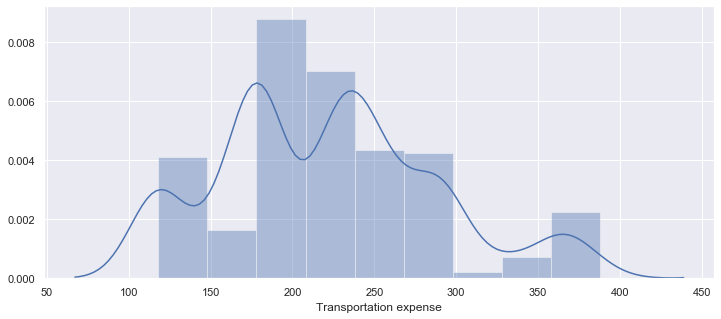

In [248]:
plt.figure(figsize = (12,5))
sns.distplot(df_target_id_reason_month['Transportation expense'], bins = 9)
plt.show()

### Distance from Residence to Work

In [249]:
df_target_id_reason_month['Distance from Residence to Work'].describe()

count    737.000000
mean      29.624152
std       14.843701
min        5.000000
25%       16.000000
50%       26.000000
75%       50.000000
max       52.000000
Name: Distance from Residence to Work, dtype: float64

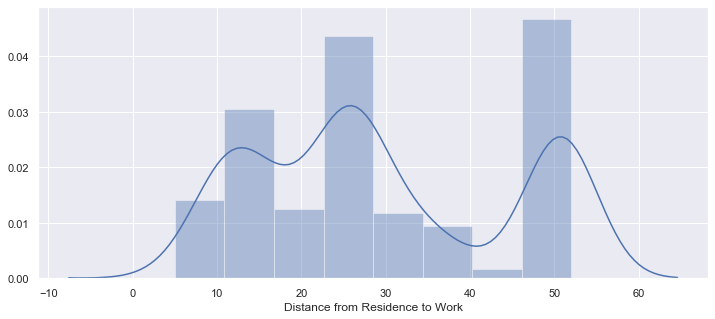

In [250]:
plt.figure(figsize = (12,5))
sns.distplot(df_target_id_reason_month['Distance from Residence to Work'], bins = 8)
plt.show()

### Service time

In [251]:
df_target_id_reason_month['Service time'].describe()

count    737.000000
mean      12.549525
std        4.393121
min        1.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       29.000000
Name: Service time, dtype: float64

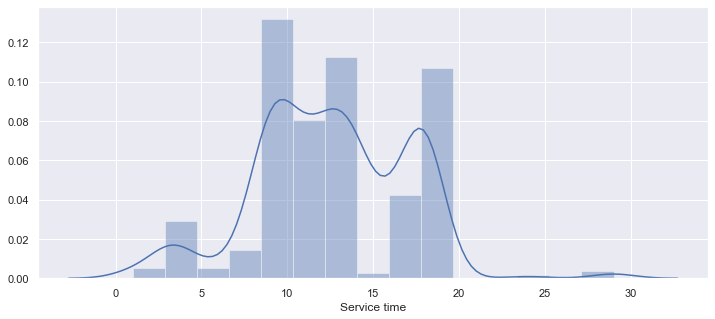

In [252]:
plt.figure(figsize = (12,5))
sns.distplot(df_target_id_reason_month['Service time'], bins = 15)
plt.show()

### Age

In [253]:
df_target_id_reason_month['Age'].describe()

count    737.000000
mean      36.419267
std        6.461156
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

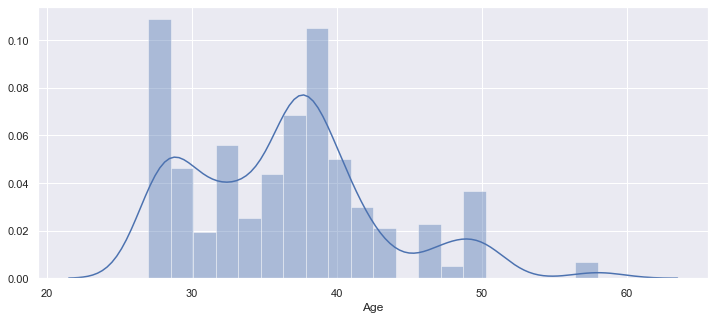

In [254]:
plt.figure(figsize = (12,5))
sns.distplot(df_target_id_reason_month['Age'], bins = 20)
plt.show()

### Work load Average/day

In [255]:
df_target_id_reason_month['Work load Average/day '].describe()

count    737.000000
mean     271.491339
std       39.137634
min      205.917000
25%      244.387000
50%      264.249000
75%      294.217000
max      378.884000
Name: Work load Average/day , dtype: float64

### Hit target

In [256]:
df_target_id_reason_month['Hit target'].describe()

count    737.000000
mean      94.586160
std        3.786916
min       81.000000
25%       93.000000
50%       95.000000
75%       97.000000
max      100.000000
Name: Hit target, dtype: float64

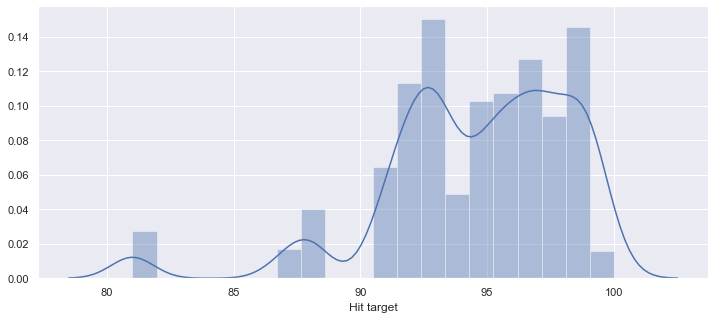

In [257]:
plt.figure(figsize = (12,5))
sns.distplot(df_target_id_reason_month['Hit target'], bins = 20)
plt.show()

### Disciplinary failure

In [258]:
df_target_id_reason_month['Disciplinary failure'].value_counts()

0    697
1     40
Name: Disciplinary failure, dtype: int64

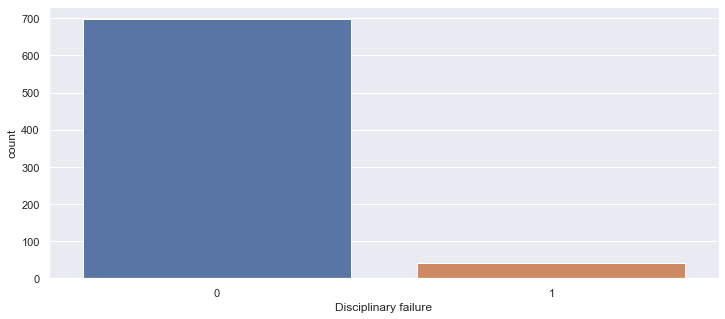

In [259]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month['Disciplinary failure'])
plt.show()

### Education

In [260]:
df_target_id_reason_month['Education'].value_counts()

1    608
3     79
2     46
4      4
Name: Education, dtype: int64

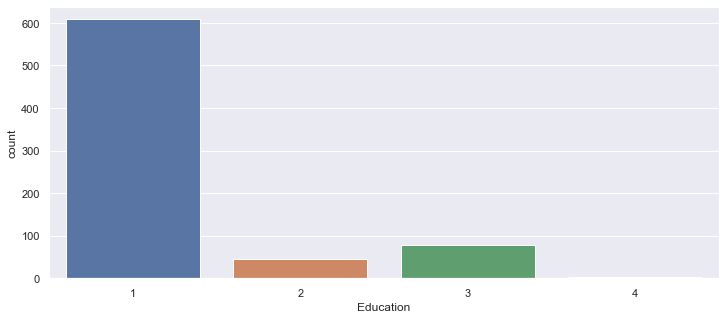

In [261]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month['Education'])
plt.show()

In [262]:
df_target_id_reason_month_ed = df_target_id_reason_month.copy()
df_target_id_reason_month_ed['Education'] = df_target_id_reason_month['Education'].map({1 : 0, 2 : 1, 3 : 1, 4 : 1})
df_target_id_reason_month_ed['Education'].value_counts()

0    608
1    129
Name: Education, dtype: int64

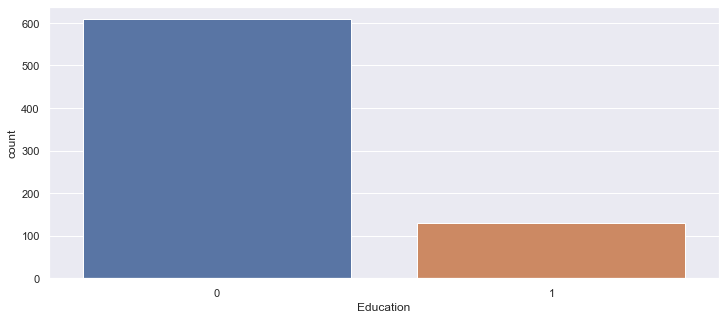

In [263]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month_ed['Education'])
plt.show()

### Son

In [264]:
df_target_id_reason_month_ed['Son'].value_counts()

0    298
1    227
2    155
4     42
3     15
Name: Son, dtype: int64

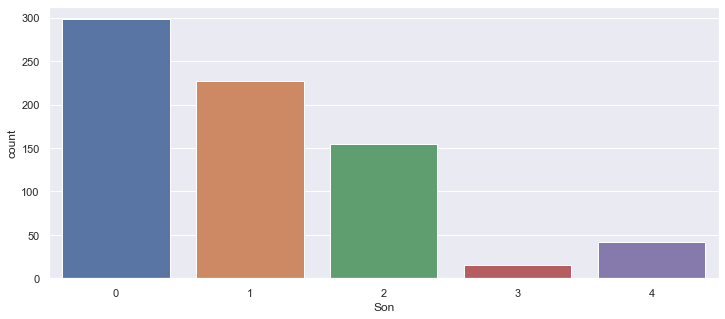

In [265]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month_ed['Son'])
plt.show()

### Social drinker

In [266]:
df_target_id_reason_month_ed['Social drinker'].value_counts()

1    418
0    319
Name: Social drinker, dtype: int64

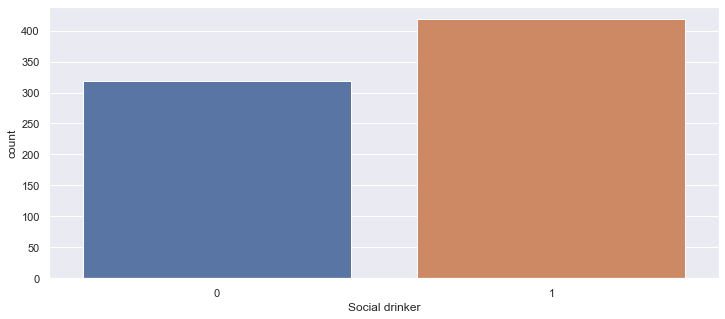

In [267]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month_ed['Social drinker'])
plt.show()

### Social smoker

In [268]:
df_target_id_reason_month_ed['Social smoker'].value_counts()

0    683
1     54
Name: Social smoker, dtype: int64

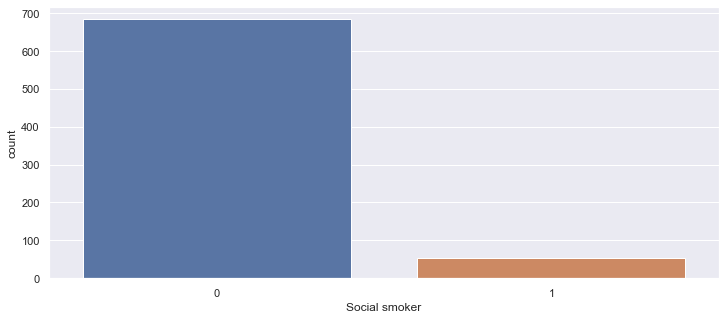

In [269]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month_ed['Social smoker'])
plt.show()

### Pet

In [270]:
df_target_id_reason_month_ed['Pet'].value_counts()

0    460
1    137
2     95
4     32
8      7
5      6
Name: Pet, dtype: int64

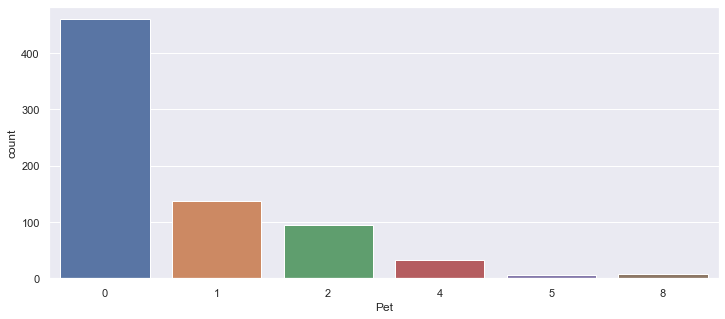

In [271]:
plt.figure(figsize = (12,5))
sns.countplot(df_target_id_reason_month_ed['Pet'])
plt.show()

### Weight

In [272]:
df_target_id_reason_month_ed['Weight'].describe()

count    737.000000
mean      78.983718
std       12.866993
min       56.000000
25%       69.000000
50%       83.000000
75%       89.000000
max      108.000000
Name: Weight, dtype: float64

### Height

In [273]:
df_target_id_reason_month_ed['Height'].describe()

count    737.000000
mean     172.116689
std        6.045341
min      163.000000
25%      169.000000
50%      170.000000
75%      172.000000
max      196.000000
Name: Height, dtype: float64

### Body mass index
    We can calculate Body mass index using the formula:
$$ BMI = \frac{WEIGHT(kg)}{HEIGHT(m)^2} $$
    so we expect high correlation between this features.

In [274]:
df_target_id_reason_month_ed['Body mass index'].describe()

count    737.000000
mean      26.658073
std        4.274201
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

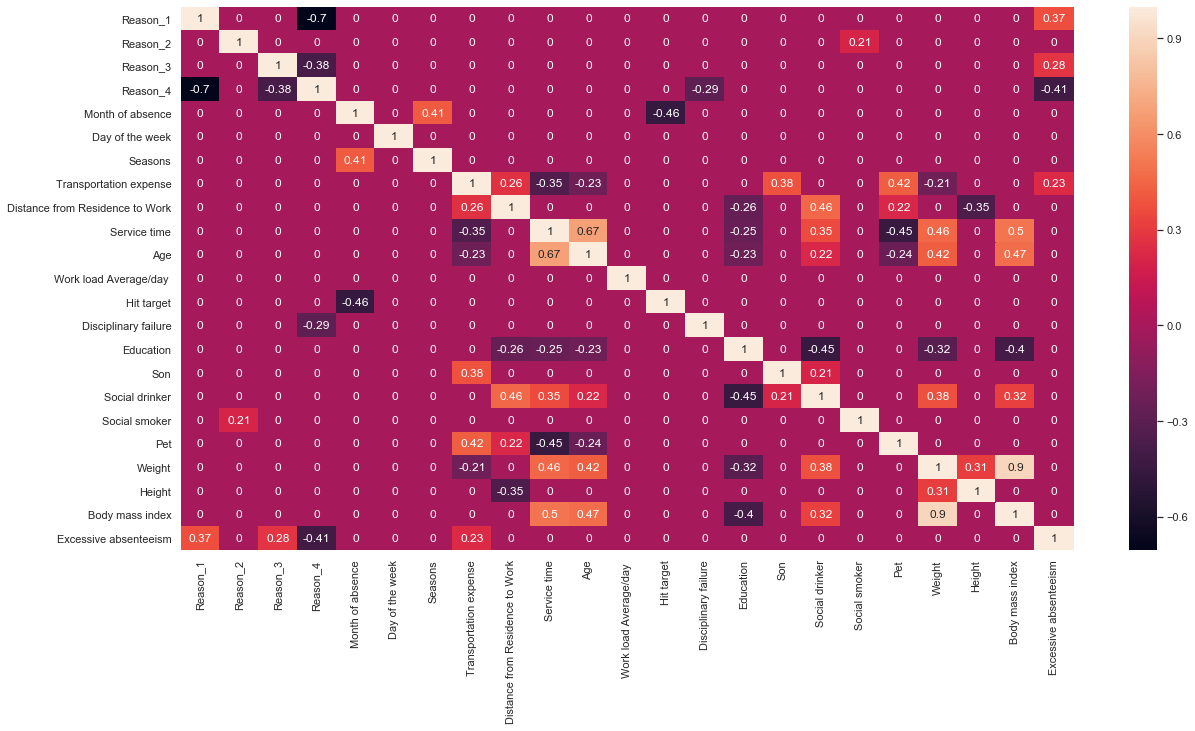

In [275]:
corr = np.round(df_target_id_reason_month_ed.corr(),3)
corr_2 = np.where(np.abs(corr)< 0.2, 0, corr)
corr = pd.DataFrame(data=corr_2, columns = corr.columns.values, index = corr.columns.values)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)
plt.show()

    We can observe really high correlation (0.9) between Weight and Body Mass Index, so let's remove BMI.

In [276]:
df_target_id_reason_month_ed_bmi = df_target_id_reason_month_ed.drop(['Body mass index'], axis = 1)
df_target_id_reason_month_ed_bmi.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Excessive absenteeism
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,0
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,0
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,0


In [277]:
data_preprocessed = df_target_id_reason_month_ed_bmi.copy()

In [278]:
data_preprocessed.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Excessive absenteeism
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,0.256445,0.008141,0.090909,0.590231,6.350068,3.913161,2.546811,221.514247,29.624152,12.549525,36.419267,271.491339,94.586160,0.054274,0.175034,1.017639,0.567164,0.073270,0.734057,78.983718,172.116689,0.378562
std,0.436967,0.089921,0.287675,0.492125,3.419430,1.422090,1.112329,66.960952,14.843701,4.393121,6.461156,39.137634,3.786916,0.226712,0.380254,1.100130,0.495805,0.260756,1.292682,12.866993,6.045341,0.485358
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,1.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,1.000000


In [279]:
data_preprocessed.shape

(737, 22)

In [280]:
data_preprocessed.to_csv('Absenteeism_preprocessed.csv', index = False)

#### To sum up
    Our dataset includes 21 features and target. 
    Features: Reason_1, Reason_2, Reason_3, Reason_4, Disciplinary failure, Education, Social Drinker, Social smoker
    include 0s and 1s only.
    Features: Month of absence,	Day of the week, Seasons are categorical data.
    The rest of the features are numerical.
    
    The target includes 0s and 1s only, where 1 means that the employee is absent for more than 4 hours. 
    Target is imbalanced, because we have 38% of ones and 62% zeros.

## 3. Building and training models

    We will create two datasets: scaled and unscaled to compare results depend on the data.
    Next, we will split both datasets into train and test data.
    We will use the given training data to develop high-performance predictive models.

In [281]:
data_preprocessed.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172
5,0,0,0,1,7,6,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170
6,0,0,0,1,7,6,1,361,52,3,28,239.554,97,0,0,1,1,0,4,80,172
7,0,0,0,1,7,6,1,260,50,11,36,239.554,97,0,0,4,1,0,0,65,168
8,0,0,1,0,7,2,1,155,12,14,34,239.554,97,0,0,2,1,0,0,95,196
9,0,0,0,1,7,2,1,235,11,14,37,239.554,97,0,1,1,0,0,1,88,172


In [282]:
inputs_no_scaled = data_preprocessed.iloc[:,:-1]

In [283]:
inputs_no_scaled.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height'], dtype=object)

In [284]:
to_scale_col = ['Month of absence', 'Day of the week', 'Seasons',
                'Transportation expense', 'Distance from Residence to Work',
                'Service time', 'Age', 'Work load Average/day ', 'Hit target', 
                'Son', 'Pet', 'Weight', 'Height']
no_scale_col = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
                'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']
to_scale = inputs_no_scaled[to_scale_col]

In [285]:
to_scale.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height
0,7,3,1,289,36,13,33,239.554,97,2,1,90,172
1,7,3,1,118,13,18,50,239.554,97,1,0,98,178
2,7,4,1,179,51,18,38,239.554,97,0,0,89,170
3,7,5,1,279,5,14,39,239.554,97,2,0,68,168
4,7,5,1,289,36,13,33,239.554,97,2,1,90,172


In [286]:
std = StandardScaler()
std.fit(to_scale)
scaled = std.transform(to_scale)

In [287]:
scaled_df = pd.DataFrame(data= scaled, columns = to_scale_col)

In [288]:
scaled_df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height
0,0.190199,-0.642562,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,0.893556,0.205869,0.856747,-0.019315
1,0.190199,-0.642562,-1.39155,-1.546940,-1.120707,1.241526,2.103332,-0.816581,0.637849,-0.016045,-0.568242,1.478916,0.973858
2,0.190199,0.061105,-1.39155,-0.635342,1.441040,1.241526,0.244818,-0.816581,0.637849,-0.925645,-0.568242,0.778976,-0.350373
3,0.190199,0.764773,-1.39155,0.859080,-1.660022,0.330394,0.399694,-0.816581,0.637849,0.893556,-0.568242,-0.854215,-0.681431
4,0.190199,0.764773,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,0.893556,0.205869,0.856747,-0.019315


In [289]:
inputs_scaled = pd.concat([inputs_no_scaled[no_scale_col], scaled_df], sort = False, axis = 1)

In [290]:
inputs_scaled.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Disciplinary failure,Education,Social drinker,Social smoker,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height
0,0,0,0,1,0,0,1,0,0.190199,-0.642562,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,0.893556,0.205869,0.856747,-0.019315
1,0,0,0,0,1,0,1,0,0.190199,-0.642562,-1.39155,-1.546940,-1.120707,1.241526,2.103332,-0.816581,0.637849,-0.016045,-0.568242,1.478916,0.973858
2,0,0,0,1,0,0,1,0,0.190199,0.061105,-1.39155,-0.635342,1.441040,1.241526,0.244818,-0.816581,0.637849,-0.925645,-0.568242,0.778976,-0.350373
3,1,0,0,0,0,0,1,1,0.190199,0.764773,-1.39155,0.859080,-1.660022,0.330394,0.399694,-0.816581,0.637849,0.893556,-0.568242,-0.854215,-0.681431
4,0,0,0,1,0,0,1,0,0.190199,0.764773,-1.39155,1.008522,0.429824,0.102611,-0.529563,-0.816581,0.637849,0.893556,0.205869,0.856747,-0.019315


In [291]:
target = data_preprocessed.iloc[:, -1]

### Splitting data

In [292]:
x_train_no_scaled, x_test_no_scaled, y_train_no_scaled, y_test_no_scaled = train_test_split(inputs_no_scaled, target,
                                                                                           test_size = 0.2,
                                                                                           random_state = 42,
                                                                                           stratify = target)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(inputs_scaled, target,
                                                                                           test_size = 0.2,
                                                                                           random_state = 42,
                                                                                           stratify = target)

### 3.1 Logistic Regression

In [293]:
lr_sc = LogisticRegression(solver = 'liblinear')
lr_sc.fit(x_train_scaled, y_train_scaled)

lr_no_sc = LogisticRegression(solver = 'liblinear')
lr_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.2 Decision Tree

In [294]:
dt_sc = DecisionTreeClassifier()
dt_sc.fit(x_train_scaled, y_train_scaled)

dt_no_sc = DecisionTreeClassifier()
dt_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 3.3 Random Forest

In [295]:
rf_sc = RandomForestClassifier(n_estimators = 10)
rf_sc.fit(x_train_scaled, y_train_scaled)

rf_no_sc = RandomForestClassifier(n_estimators = 10)
rf_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 3.4 K-Nearest Neighbours

In [296]:
knn_sc = KNeighborsClassifier()
knn_sc.fit(x_train_scaled, y_train_scaled)

knn_no_sc = KNeighborsClassifier()
knn_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 3.5 Stochastic Gradient Descent

In [297]:
sgd_sc = SGDClassifier(loss = 'log')
sgd_sc.fit(x_train_scaled, y_train_scaled)

sgd_no_sc = SGDClassifier(loss = 'log')
sgd_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 3.6 Support Vector Machines (Linear)

In [298]:
svm_l_sc = SVC(kernel='linear', C=0.1, gamma=0.1, probability= True)
svm_l_sc.fit(x_train_scaled, y_train_scaled)

svm_l_no_sc = SVC(kernel='linear', C=0.1,gamma=0.1, probability= True)
svm_l_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### 3.7 Support Vector Machines (Radial)

In [299]:
svm_r_sc = SVC(kernel='rbf', C=0.1,gamma=0.1, probability= True)
svm_r_sc.fit(x_train_scaled, y_train_scaled)

svm_r_no_sc = SVC(kernel='rbf',C=0.1,gamma=0.1, probability= True)
svm_r_no_sc.fit(x_train_no_scaled, y_train_no_scaled)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## 4.  Evaluating models

#### * Accuracy

In [300]:
models_sc = [lr_sc, dt_sc, rf_sc, knn_sc, sgd_sc, svm_l_sc, svm_r_sc]
accuracy_sc_tr = []
accuracy_sc_te = []
for i in models_sc:
    accuracy_sc_tr.append(i.score(x_train_scaled, y_train_scaled))
    accuracy_sc_te.append(i.score(x_test_scaled, y_test_scaled))

In [301]:
models_no_sc = [lr_no_sc, dt_no_sc, rf_no_sc, knn_no_sc, sgd_no_sc, svm_l_no_sc, svm_r_no_sc]
accuracy_no_sc_tr = []
accuracy_no_sc_te = []
for i in models_no_sc:
    accuracy_no_sc_tr.append(i.score(x_train_no_scaled, y_train_no_scaled))
    accuracy_no_sc_te.append(i.score(x_test_no_scaled, y_test_no_scaled))

In [302]:
models_name = ['LR', 'DT', 'RF', 'KNN', 'SGD', 'SVM_L', 'SVM_R']
accuracy = pd.DataFrame(data= [accuracy_sc_tr, accuracy_sc_te, accuracy_no_sc_tr, accuracy_no_sc_te], 
                        columns = models_name,
                        index = ['Accuracy(train scaled)', 'Accuracy(test scaled)',
                                   'Accuracy(train no scaled)', ' Accuracy(test no scaled)'])

In [303]:
accuracy

,LR,DT,RF,KNN,SGD,SVM_L,SVM_R
Accuracy(train scaled),0.792869,0.988115,0.964346,0.801358,0.730051,0.772496,0.621392
Accuracy(test scaled),0.777027,0.743243,0.777027,0.695946,0.736486,0.763514,0.621622
Accuracy(train no scaled),0.794567,0.988115,0.969440,0.782683,0.621392,0.772496,0.621392
Accuracy(test no scaled),0.783784,0.729730,0.750000,0.635135,0.621622,0.763514,0.621622


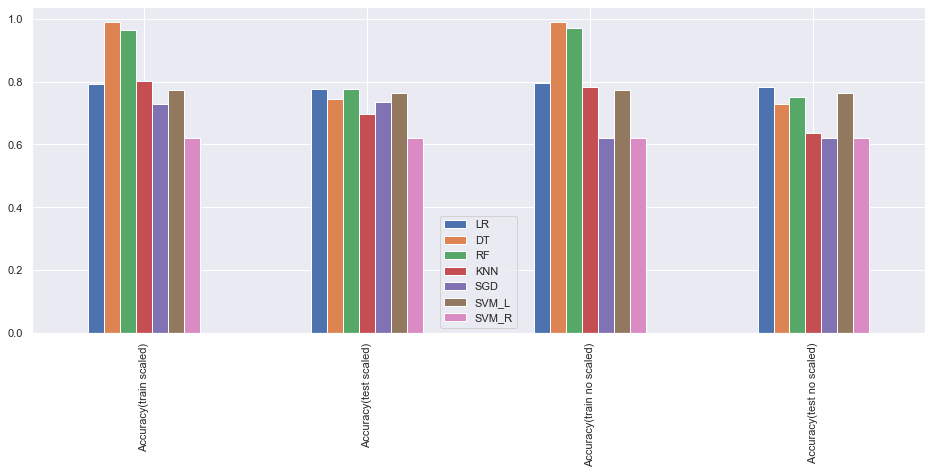

In [304]:
accuracy.plot(kind = 'bar', figsize = (16,6))
plt.show()

In [305]:
accuracy.loc['Accuracy(train scaled)']['DT'] - accuracy.loc['Accuracy(test scaled)']['DT']

0.24487220667186715

In [306]:
accuracy.loc['Accuracy(train scaled)']['RF'] - accuracy.loc['Accuracy(test scaled)']['RF']

0.1873193227183041

    Immediately we can observe that two models Decision Tree and Random Forest have high accuracy, 
    but only for training data. The difference accuracy between training and  test equals for both models more than 20%.
    Decision Tree and Random Forest are overfitted.
    
    As we mention earlier our target is imbalanced, so accuracy isn't best metrics to check performance predictive models.
    Let's compare our models based on the other metrics.

#### *AUC and ROC Curve

    AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. 
    ROC is a probability curve and AUC represents degree or measure of separability. 
    It tells how much model is capable of distinguishing between classes. 
    Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
    The ROC curve is plotted with True Positive Rate against the False Positive Rate.

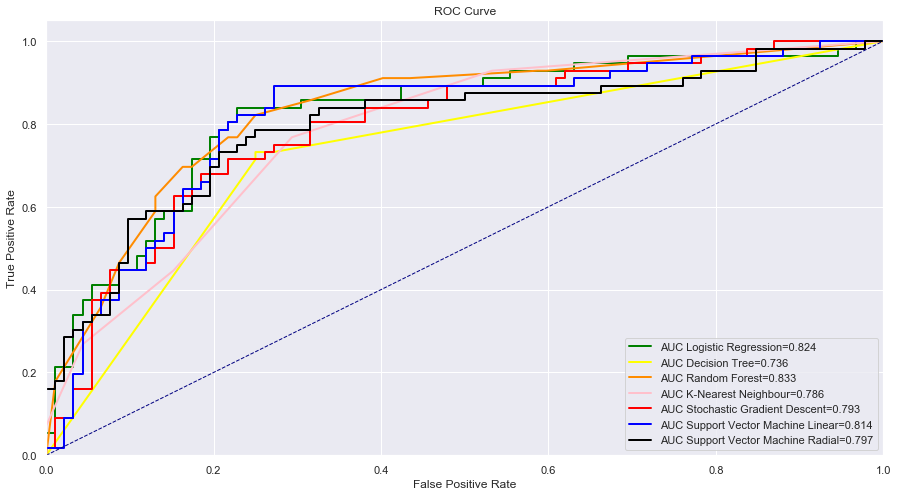

In [307]:
lr_prediction_proba = lr_sc.predict_proba(x_test_scaled)[:, 1]
dt_prediction_proba = dt_sc.predict_proba(x_test_scaled)[:, 1]
rf_prediction_proba = rf_sc.predict_proba(x_test_scaled)[:, 1]
knn_prediction_proba = knn_sc.predict_proba(x_test_scaled)[:, 1]
sgd_prediction_proba = sgd_sc.predict_proba(x_test_scaled)[:, 1]
svm_l_prediction_proba=svm_l_sc.predict_proba(x_test_scaled)[:,1]
svm_r_prediction_proba=svm_r_sc.predict_proba(x_test_scaled)[:,1]

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    roc_auc = roc_auc_score(y_test, pred_proba)
    return fpr, tpr, roc_auc
auc= []

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 14})
plt.grid(True)
#lr
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, lr_prediction_proba)
plt.plot(fpr, tpr, color='green', lw=2, label='AUC Logistic Regression={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#dt
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, dt_prediction_proba)
plt.plot(fpr, tpr, color='yellow', lw=2, label='AUC Decision Tree={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#rf
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, rf_prediction_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC Random Forest={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#knn
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, knn_prediction_proba)
plt.plot(fpr, tpr, color='pink', lw=2, label='AUC K-Nearest Neighbour={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#sgd
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, sgd_prediction_proba)
plt.plot(fpr, tpr, color='red', lw=2, label='AUC Stochastic Gradient Descent={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#svm_l
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, svm_l_prediction_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC Support Vector Machine Linear={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#svm_rbf
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, svm_r_prediction_proba)
plt.plot(fpr, tpr, color='black', lw=2, label='AUC Support Vector Machine Radial={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [308]:
AUC = pd.DataFrame(auc, index = models_name, columns = ['AUC scaled'] )

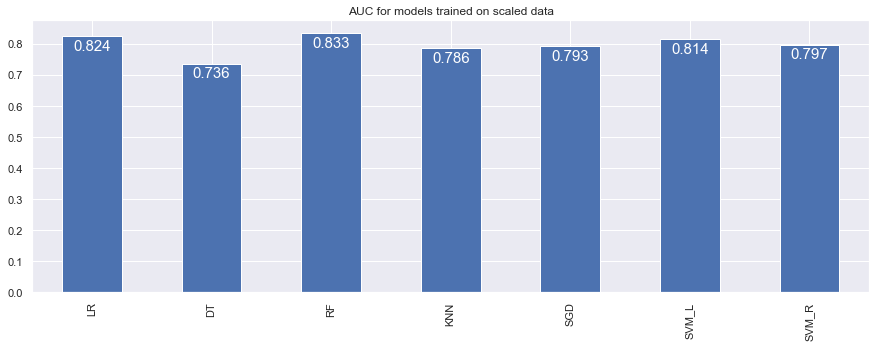

In [309]:
ax = AUC.plot(kind = 'bar', figsize = (15,5), legend = False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, -10), size = 15, color = 'white', textcoords='offset points')
plt.title('AUC for models trained on scaled data')
plt.show()

In [310]:
auc_no_sc= []
for i in models_no_sc:
    pred_proba = i.predict_proba(x_test_no_scaled)[:,1]
    auc = roc_auc_score(y_test_no_scaled, pred_proba)
    auc_no_sc.append(auc)

In [311]:
AUC['AUC no scaled'] = auc_no_sc

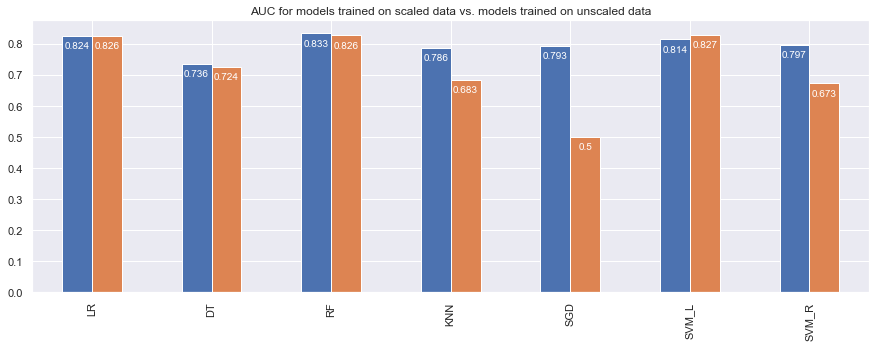

In [312]:
ax = AUC.plot(kind = 'bar', figsize = (15,5), legend = False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, -10), size = 10, color = 'white', textcoords='offset points')
plt.title('AUC for models trained on scaled data vs. models trained on unscaled data')
plt.show()

    Most of our models obtain better results for scaled dataset, so in further analysis we'll concentrate on
    scaled data.

### K-Fold Cross Validation

In [313]:
kfold = KFold(n_splits=5, random_state=42)
mean=[]
std=[]
for i in models_sc:
    cv_result = cross_val_score(i, x_train_scaled, y_train_scaled, cv = kfold, scoring = "accuracy")
    mean.append(cv_result.mean())
    std.append(cv_result.std())
cv_result = pd.DataFrame({'CV Mean':mean,'CV Std':std}, index = models_name)       
cv_result

,CV Mean,CV Std
LR,0.767478,0.031979
DT,0.733420,0.025187
RF,0.772519,0.017804
KNN,0.701275,0.031201
SGD,0.730001,0.029058
SVM_L,0.772519,0.034333
SVM_R,0.621469,0.029248


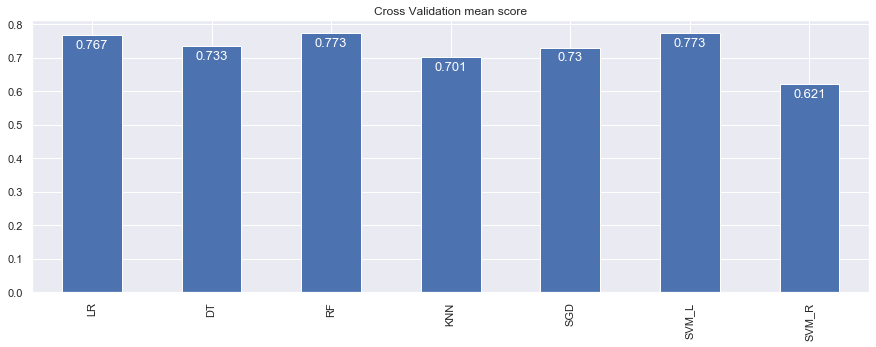

In [314]:
ax = cv_result.iloc[:, 0].plot(kind = 'bar', figsize = (15,5))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, -10), size = 13, color = 'white', textcoords='offset points')
plt.title('Cross Validation mean score')
plt.show()

    Based on all received results we can say that Logistic Regression, Random Forest and 
    Support Vector Machine (Linear) have the most predictive power, so let's choose them and execute further analysis.

In [315]:
lr_sc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
rf_sc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [317]:
svm_l_sc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## 5. Hyper-Parameters Tuning

In [318]:
models = {'LR': lr_sc, 'RF': rf_sc, 'SVM_L' : svm_l_sc}
params = {'LR': {'C':[0.01, 0.1, 1, 1.3], 'max_iter':[50, 100, 150, 200]},
          'RF': { 'n_estimators': [100, 200, 250, 300], 'max_depth': np.arange(3, 10)},
          'SVM_L': {'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1], 'degree': [2, 3]}, 'kernel' : 'linear'}
def grid_search(x, y):
    score=[]
    for i in models.keys():
        m = models[i]
        p = params[i]
        gs = GridSearchCV(estimator = m, param_grid = p, cv = 5)
        gs.fit(x, y)
        score.append(gs.best_score_)
        print(gs.best_params_)
    return pd.DataFrame(data=np.concatenate([np.asarray(score)]).reshape(1,3).T,
                        columns=['best_score'], index=['LR', 'RF', 'SVM_L'])

In [319]:
grid_search(x_train_scaled, y_train_scaled)

{'C': 1, 'max_iter': 50}
{'max_depth': 8, 'n_estimators': 100}
{'C': 0.1, 'degree': 2, 'gamma': 0.01}


,best_score
LR,0.774194
RF,0.818336
SVM_L,0.772496


In [320]:
lr = LogisticRegression(C = 1, max_iter = 50, solver = 'liblinear')
rf = RandomForestClassifier(max_depth = 8, n_estimators = 100)
svm_r = SVC(kernel = 'linear', C = 0.1, degree = 2, gamma = 0.01)

### ACCURACY

In [321]:
models_best = [lr_sc, rf_sc, svm_l_sc]
a = []
b = []
c = []
for i in models_best:
    a.append(i.score(x_train_scaled, y_train_scaled))
    b.append(i.score(x_test_scaled, y_test_scaled))
    c.append(cross_val_score(i, x_train_scaled, y_train_scaled, cv = 5).mean())

In [322]:
accuracy_best = pd.DataFrame([a, b, c], index = ['Train', 'Test', 'Validate'], columns = ['LR', 'RF', 'SVM_L'])

In [323]:
accuracy_best

,LR,RF,SVM_L
Train,0.792869,0.964346,0.772496
Test,0.777027,0.777027,0.763514
Validate,0.774323,0.763952,0.772542


### CLASSIFICATION REPORT

In [324]:
models_name = ['Logistic Regression', 'Random Forest', 'Support Vector Machine (radial)']
for i,j in zip(models_best, models_name):
    pred = i.predict(x_test_scaled)
    print('Classification Report:'+str(j))
    print(classification_report(y_test_scaled, pred))
    print('--'*40,'\n')

Classification Report:Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        92
           1       0.71      0.70      0.70        56

    accuracy                           0.78       148
   macro avg       0.76      0.76      0.76       148
weighted avg       0.78      0.78      0.78       148

-------------------------------------------------------------------------------- 

Classification Report:Random Forest
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        92
           1       0.71      0.70      0.70        56

    accuracy                           0.78       148
   macro avg       0.76      0.76      0.76       148
weighted avg       0.78      0.78      0.78       148

-------------------------------------------------------------------------------- 

Classification Report:Support Vector Machine (radial)
              precision    recall  f1-score   su

### AUC

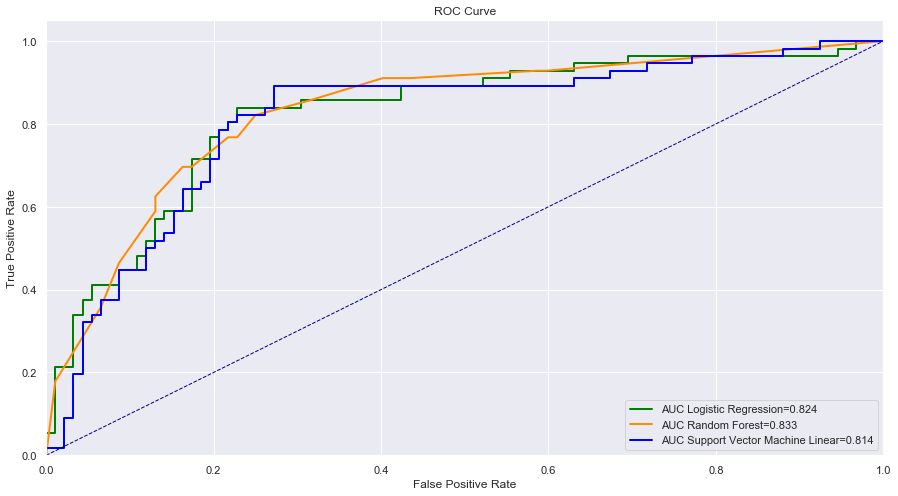

In [325]:
lr_prediction_proba = lr_sc.predict_proba(x_test_scaled)[:, 1]
rf_prediction_proba = rf_sc.predict_proba(x_test_scaled)[:, 1]
svm_l_prediction_proba=svm_l_sc.predict_proba(x_test_scaled)[:,1]
auc= []

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 14})
plt.grid(True)
#lr
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, lr_prediction_proba)
plt.plot(fpr, tpr, color='green', lw=2, label='AUC Logistic Regression={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#rf
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, rf_prediction_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC Random Forest={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#svm_l
fpr, tpr, roc_auc = roc_curve_and_score(y_test_scaled, svm_l_prediction_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC Support Vector Machine Linear={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [326]:
AUC_best = pd.DataFrame(auc, columns = ['AUC'], index = ['LR', 'RF', 'SVM_L'])

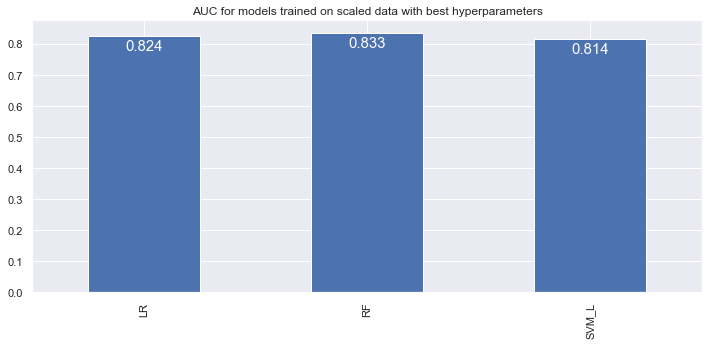

In [327]:
ax = AUC_best.plot(kind = 'bar', legend = False, figsize = (12,5))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, -10), size = 15, color = 'white', textcoords='offset points')
plt.title('AUC for models trained on scaled data with best hyperparameters')
plt.show()

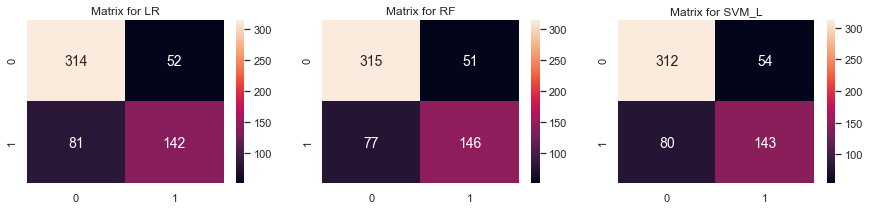

In [328]:
f, ax = plt.subplots(1, 3, figsize=(15,3))

y_pred = cross_val_predict(lr_sc, x_train_scaled, y_train_scaled, cv = 5)
sns.heatmap(confusion_matrix(y_train_scaled, y_pred), ax = ax[0], annot=True, fmt='2.0f')
ax[0].set_title('Matrix for LR')

y_pred = cross_val_predict(rf_sc, x_train_scaled, y_train_scaled, cv = 5)
sns.heatmap(confusion_matrix(y_train_scaled, y_pred), ax = ax[1], annot=True, fmt='2.0f')
ax[1].set_title('Matrix for RF')

y_pred = cross_val_predict(svm_l_sc, x_train_scaled, y_train_scaled, cv = 5)
sns.heatmap(confusion_matrix(y_train_scaled, y_pred), ax = ax[2], annot=True, fmt='2.0f')
ax[2].set_title('Matrix for SVM_L')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

    We dropped from our dataset 'Body Mass Index', because it has high correlation coefficient with 'weight' 
    and 'height'. Let's compare results for data with this removed feature.

In [334]:
df_all = df_target_id_reason_month_ed.copy()
df_input = df_all.iloc[:, :-1]
df_target = df_all.iloc[:, -1]
std = StandardScaler()
sc_df_input = std.fit_transform(df_input)

In [335]:
x_tr_all, x_te_all, y_tr_all, y_te_all = train_test_split(sc_df_input, df_target, test_size = 0.2,
                                                         stratify = df_target, random_state = 42) 

In [336]:
rf_mod = RandomForestClassifier(max_depth = 8, n_estimators = 100)
rf_mod.fit(x_tr_all, y_tr_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [337]:
lr_mod = LogisticRegression(C = 1, max_iter = 50, solver = 'liblinear')
lr_mod.fit(x_tr_all, y_tr_all)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
svm_mod = SVC(kernel = 'linear', C = 0.1, degree = 2, gamma = 0.01, probability = True)
svm_mod.fit(x_tr_all, y_tr_all)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

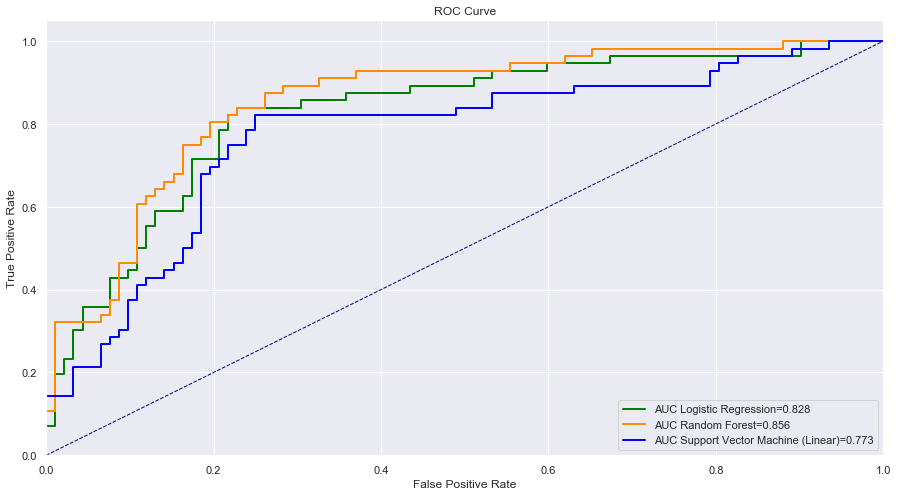

In [339]:
rf_pp_all = rf_mod.predict_proba(x_te_all)[:, 1]
lr_pp_all = lr_mod.predict_proba(x_te_all)[:, 1]
svm_pp_all = svm_mod.predict_proba(x_te_all)[:, 1]
auc= []

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 14})
plt.grid(True)
#lr
fpr, tpr, roc_auc = roc_curve_and_score(y_te_all, lr_pp_all)
plt.plot(fpr, tpr, color='green', lw=2, label='AUC Logistic Regression={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#rf
fpr, tpr, roc_auc = roc_curve_and_score(y_te_all, rf_pp_all)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC Random Forest={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#svm
fpr, tpr, roc_auc = roc_curve_and_score(y_te_all, svm_pp_all)
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC Support Vector Machine (Linear)={0:.3f}'.format(roc_auc))
auc.append(roc_auc)
#line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

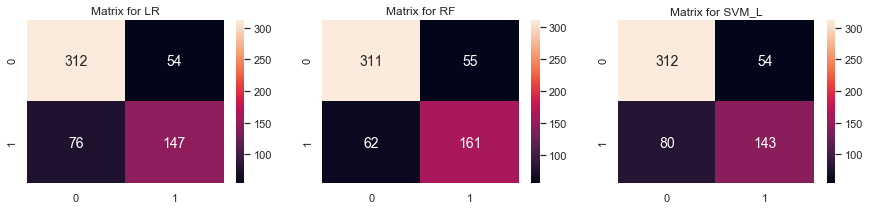

In [344]:
f, ax = plt.subplots(1, 3, figsize=(15,3))

y_pred = cross_val_predict(lr_mod, x_tr_all, y_tr_all, cv = 5)
sns.heatmap(confusion_matrix(y_tr_all, y_pred), ax = ax[0], annot=True, fmt='2.0f')
ax[0].set_title('Matrix for LR')

y_pred = cross_val_predict(rf_mod, x_tr_all, y_tr_all, cv = 5)
sns.heatmap(confusion_matrix(y_tr_all, y_pred), ax = ax[1], annot=True, fmt='2.0f')
ax[1].set_title('Matrix for RF')

y_pred = cross_val_predict(svm_mod, x_tr_all, y_tr_all, cv = 5)
sns.heatmap(confusion_matrix(y_tr_all, y_pred), ax = ax[2], annot=True, fmt='2.0f')
ax[2].set_title('Matrix for SVM_L')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## Feature Importance

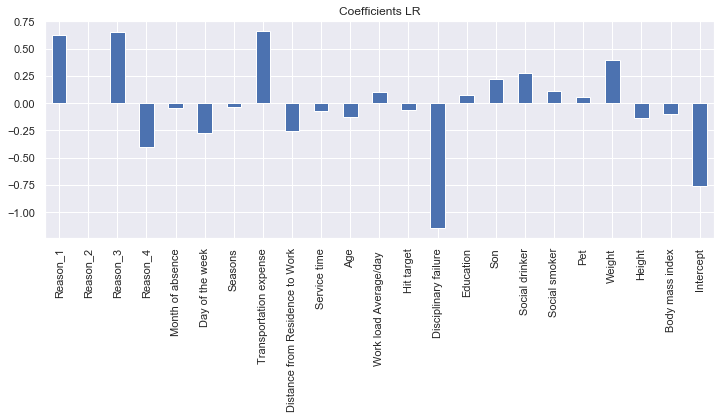

In [341]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = df_input.columns)
summary_table['Coefficient LR'] = np.transpose(lr_mod.coef_)
summary_table['Coefficient SVM_L'] = np.transpose(svm_mod.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_mod.intercept_[0], svm_mod.intercept_[0] ]
summ = summary_table.iloc[:,1:].values
summ_df = pd.DataFrame(summ, index = summary_table['Feature name'].values,
                       columns = ['Coefficient LR', 'Coefficient SVM_L'])
summ_df.iloc[:, 0].plot(kind = 'bar', figsize = (12,4))
plt.title('Coefficients LR')
plt.show()

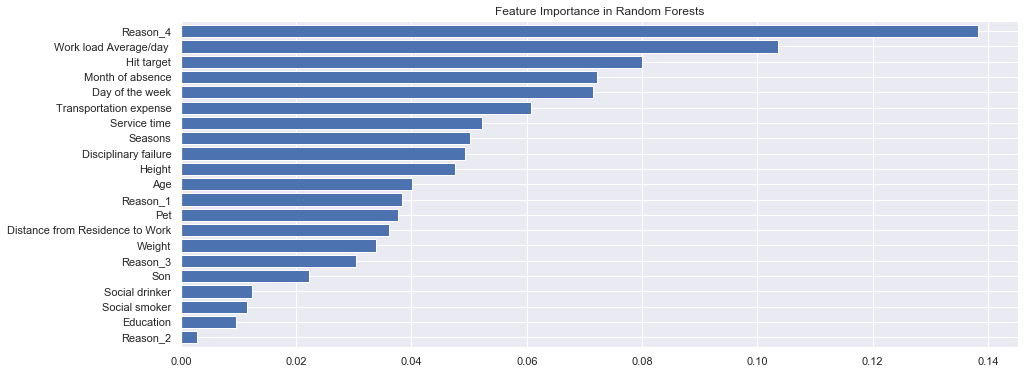

In [342]:
plt.figure(figsize=(15, 6))
pd.Series(rf_sc.feature_importances_, inputs_scaled.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forests')
plt.show()

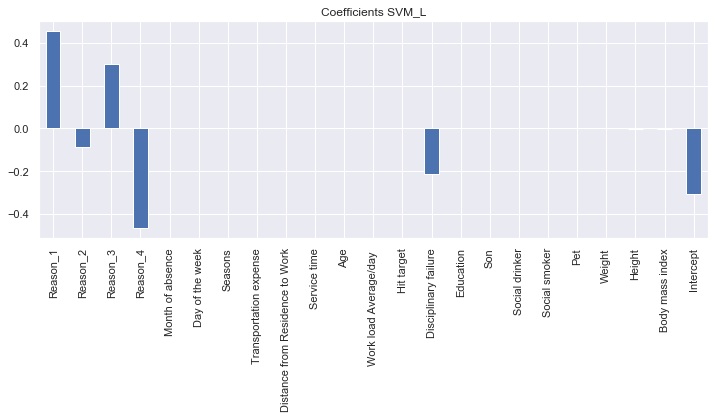

In [343]:
summ_df.iloc[:, 1].plot(kind = 'bar', figsize = (12,4))
plt.title('Coefficients SVM_L')
plt.show()

 ## 6. **THE BEST MODEL IS : Random Forest**